## Project: Analyzing NYC High School data 
The SAT, or Scholastic Aptitude Test, is a test given to graduating high schoolers in the US every year. The SAT has 3 sections, each of which is worth a maximum of 800 points. The SAT is used by colleges to determine which students to admit. High average SAT scores are usually indicative of a good school. 

New York City has published data on the SAT scores of students, along with additional demographic datasets.

- SAT scores by school -- SAT scores for each high school in New York City.
- School Attendace -- attendance information on every school in NYC.
- Class size -- class size information for each school in NYC.
- AP test results -- Advanced Placement exam results for each high school. Passing AP exams can get you college credit in the US.
- Graduation outcomes -- percentage of students who graduated, and other outcome information.
- School survey -- surveys of parents, teachers, and students at each school.

New York City has a significant immigrant population, and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to figure out if the SAT is a fair test. If certain racial groups consistently performed better on the SAT, we would have some evidence that the SAT is unfair, for example. 

The Dataframe combined contains all of our data, and is what we'll be using in our analysis.


### Read in the data
We'll read each file into a Pandas Dataframe, and then store all of the Dataframes in a dictionary. This will make it easy to reference the Dataframes later on, while storing them all into a single variable for convenience.

In [3]:
import pandas as pd
import numpy
import re
%matplotlib inline

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

### Exploring The SAT Data

The main dataset that we're interested in is the SAT dataset, which corresponds to the dictionary key sat_results. This contains information about the SAT scores for each high school in New York City. We eventually want to correlate items from this dataset with items from the other datasets.

Let's explore sat_results to see what we can discover. Exploring the Dataframe will enable us to understand the structure of the data, which will make it easier to analyze.

In [4]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


### Exploring the other data

From looking at the data, we can make a few observations:

- The DBN apprears to be a unique ID for each school.
- From looking at the first few rows of names, we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg. Score, SAT Math Avg. Score and SAT Writing Avg. Score into a single column to make it easier to analyze.

Given these observations, let's explore the other datasets to see if we cna get any insight into how to combine the datasets.

In [5]:
for k in data:
    print(data[k].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

### Reading in the surveys

From the first few rows of each dataset, we can make some observations:

- Each dataset appears to have either a DBN column, or the information to create a DBN column, so this is how we'll combine our datasets into one. We can match up rows from different datasets that have the same DBN and combine their columns.
- Some fields look interesting for mapping, particularly Location 1, which contains coordinates inside a larger string.
- Some of the datasets appear to contain multiple rows for each school (repeated DBN values), which means we'll have to do some preprocessing to ensure that DBN is unique within each dataset. If we don't do this, it will cause issues when we combine the datasets, because we might be merging two rwos in one dataset with one row in another dataset.

Before we proceed with unifying the datasets, it will be usefull to ensure we have all the data we want to unify. We mentioned the survey data, survey_all.txt and survey_d75.txt earlier, but we didn't read them in, because they were in a slightly more complex format. 

The files are tab delimited, and are encoded with Windows-1252 encoding. An encoding defines how the contents of a file are stored in binary. The most common encodings are UTF-8 and ASCII.

We'll need to specify the encoding and delimiter to the Pandas read_csv function in order to ensure the surveys are read in properly.

After we read in the survey data, we'll want to combine it into a single Dataframe. We can do this with the Pandas concat function.

In [6]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

survey.head()

C:\Users\All Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


### Cleaning Up the Surveys
There are two immediate facts that we can see in the data:
- There are over 2000 columns in the data, almost all of which we won't need. We'll need to filter this to remove columns to make it easier to work with. The fewer columns, the easier it is to print out the Dataframe, and to find correlations across the whole Dataframe.
- The survey data has a dbn column that we'll want to convert to uppercase (DBN) for consistency with other datasets.

We'll need to filter the columns to remove the ones we don't need and there is a data dictionary where we look our files [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8)

Based on the dictionary, it looks like these are the relavant columns:

["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

These columns will give us aggregate survey data about parents, teachers, and students feel about school safety, academic performance, and more. it will also give us the DBN, which allows us to uniquely identify the school.

In [7]:
# Make copy of dbn column.
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_10", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

survey.head()

C:\Users\All Users\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_10,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,NaN,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,NaN,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,NaN,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,NaN,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,NaN,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


### Add DBN Fields

When we explored all the datasets, we noticed that not every dataset had a DBN column. Specifically, class_size and hs_directory do not have the column. In the case of hs_directory, it has a dbn column, so we can just rename it.

However, class_size doesn't appear to have the column at all. From looking at these rows, it appears that the DBN is just a combination of the CSD and SCHOOL CODE columns in class_size. The main difference is that the DBN is padded so the CSD is alwys two digits -- we'll need to add a leading 0 to the CSD if the CSD is less than two digits long for consistency. As you can see, whenever the CSD is less than two digits long, we need to add a leading 0. We can accomplish this using the Pandas apply method, along with a custom function that:

- Takes in a number.
- Converts the number to a string using the str function.
- Check the length of the string using the len function.
 - If the string is two digits long, return the string.
 - If the string is one digit long, add a 0 to the front of the string, then return it.
 - If the string is b, you can do this with return "0" + b.
 
Once, we have the padded CSD, we can use the + operator to combine the values in the CSD and SCHOOL CODE columns


In [8]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

### Combining the SAT Scores

We're now almost ready to combine our datasets into one. Before we do, let's take some time to calculate variables that will be useful in our analysis. We've already discussed one such variable -- a column that combines all of the SAT scores into one number. This will make it much easier to correlate with demographic factors, because it's a single number, not three.

In order to generate this column, we'll first need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score in the sat_results dataset from the object (string) data type to a numeric datatype. We can use the to_numeric function to do this conversion. Without doing this conversion, we won't be able to add up the columns.

It's important to pass the keyword argument errors="coerce" when we call to_numeric, so that any invalid strings that can't be converted to numbers are instead treated as missing values.

After the conversion, we can just use the + operator to add all three columns together.

In [9]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

data['sat_results'][cols[2]]
# Print to see if everything went well.
print(data['sat_results']['sat_score'].head())

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


### Parsing Coordinates For Each School

We'll want to parse the coordinates for each school. This will enable us to map out the schools, and figure out any geographic patterns in the data. Currently, the coordinates are in a text field called Location 1 in the hs_directory dataset.W e want to extract the latitude and the longitude. Together, the latitude and longitude make up a pair of coordinates, and allow us to uniquely locate any place on Earth.

We can do this using a regular expression. We'll need to do further processing on this using the split and replace methods on strings to extract each coordinate.

In [10]:
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")

data["hs_directory"].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280,40.710679
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680,40.718810


We parsed the latitude from the Location 1 column. Now we'll just need to do the same for the longitude.

In [11]:
def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

### Condense datasets

The first step that we'll need to take before we can combine the data is to condense some of the datasets. Previously, we noticed that while sat_results was unique on the DBN column, and only contained a single row for each unique DBN value, some of the other datasets, such as class_size had duplicated DBN values.

In [12]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


### Computing Average Class Sizes

We don't want to only select a certain type of class in which to base our class size data on. We want our class size data to be for every single class a school offers. What we can do is take the average across all the classes a school offers. This will give us unique DBN values, but also incorporate as much data as possible into the average.

In [13]:
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


### Condensing Demographics

Now that we've finished condensing class_size, let's condense demographics

In [14]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


### Condensing Graduation

In the graduation data, the Demographic and Cohort columns are what prevent DBN from being unique. A Cohort appears to be which year the data was recorded for, and the Demographic appears to be in which group the data was collected. In this case, we want to pick data from the most recent Cohort available, 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

In [15]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


### Convert AP Scores To Numeric

We're almost ready to combine all of the datasets. The only remaining thing to do is to convert the AP test scores to numeric values from strings. The Advanced Placement, or AP, exams are taken by high school students. There are several AP exams, each corresponding to a school subject. If a high schooler passes a test with a high score, they may receive college credit. The AP is scored on a 1 to 5 scale, with anything 3 or higher being a "passing" score. Many high schoolers, particularly those who go to academically challenging high schools, take AP exams. AP exams are much rarer in schools that lack funding or don't have much academic rigor.

It will be interesting to see if AP exam scores are correlated with SAT scores across high schools. In order to determine this, we'll need to convert the AP exam scores in the ap_2010 dataset to numeric values first.

There are three columns we'll need to convert:

- AP Test Takers (note that there's a trailing space)
- Total Exams Taken
- Number of Exams with scores 3 4 or 5

Note that the first column above, AP Test Takers, has a trailing space at the end.

In [16]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
    
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


### Combine the datasets

Before we merge our data, we'll need to decide on what kind of merge strategy we want to use. We'll be using the Pandas merge function, which supports four types of joins, left, right, inner, and outer. Each of these join types dictates how rows are combined.

We'll be using the DBN to match up rows, which is how we'll know which row from the first dataset combines with the row from the second dataset. It's possible that even though the DBN is unique within each dataset, that there may be DBN values that exist in one dataset but not another. This is because the data is from different years, and each dataset has other inconsistencies in terms of how it was gathered. There may also be human and other errors in play. Therefore, we may not find matches in all of the datasets for the DBN values in sat_results, and other datasets may have DBN values that don't exist in sat_results.

We'll merge two datasets at a time. So, for example, we'll merge sat_results and hs_directory, then merge the result with ap_2010, then merge the result with class_size, and so on until we've merged all of the datasets. Once we merge all of the datasets, we'll have roughly the same number of rows, but each row will have columns from all the datasets.

### Permorming The Left Joins

Both the ap_2010 and the graduation datasets have many missing DBN values, so we'll use a left join when we join the sat_results dataset with them. A left join means that our final Dataframe will have all the same DBN values as the original sat_results Dataframe.

We'll need to use the Pandas merge method to merge Dataframes. The "left" Dataframe is the Dataframe we call the method on, whereas the "right" Dataframe is the one we pass into merge.

Because we're using the DBN column to join the Dataframes, we'll need to specify the keyword argument on="DBN" when calling merge.

We'll first assign data["sat_results"] to the variable combined. We'll then merge all the other Dataframes with combined. At the end, combined will have all of the columns from all of the datasets.

In [17]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


In [18]:
combined.shape

(479, 33)

### Performing The Inner Joins

Now that we've done the left joins, we still have class_size, demographics, survey, and hs_directory left to merge into combined. Because these files contain information that's more valuable to our analysis, and because they have fewer missing DBN values, we'll use the inner join type when merging these into combined.

In [19]:

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
    
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


In [20]:
combined.shape

(363, 159)

### Filling in Missing Values

We can fill in missing data in Pandas using the fillna method. This method will replace any missing values in a Dataframe with values that we specify. We can compute the means of every column using the mean method. If we pass the results of the mean method into the fillna method, Pandas will fill in the missing values in each column with the mean of that column.

In [21]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


### Add A School District Column For Mapping

We've finished cleaning and combining our data! We now have a clean dataset on which we can base our analysis. One type of analysis that we might want to do is mapping out statistics on a school district level. In order to help us do this, it will be useful to add a column that specifies the school district to the dataset.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

In [22]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

### Finding Correlations
Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1, and tells you if the two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the more strongly positively correlated the columns are. The closer to -1 the r value is, the more strongly negatively correlated the columns are. The closer to 0 the r value is, the less the columns are correlated.

In [23]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

### Plotting Survey Correlations

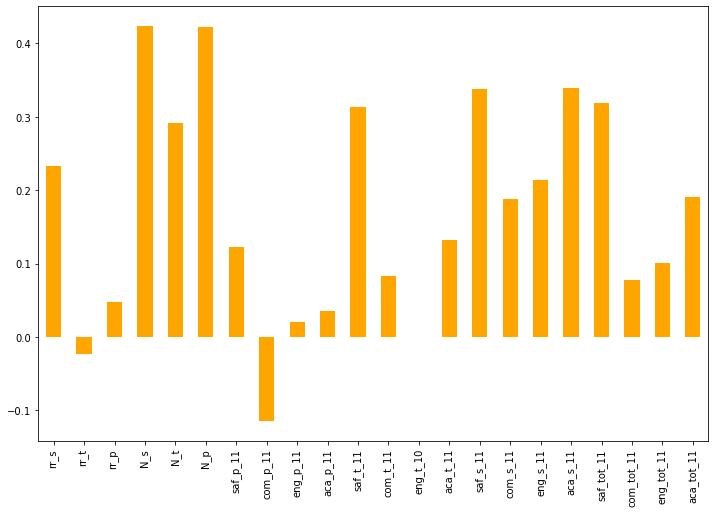

In [24]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

%matplotlib inline
combined.corr()["sat_score"][survey_fields].plot.bar(figsize=(12,8), color='orange')

Here are the description of columns in survey dataset;

__rr_s__ &emsp; Student Response Rate<br>
__rr_t__ &emsp; Teacher Response Rate<br>
__rr_p__ &emsp; Parent Response Rate<br>
__N_s__ &emsp; Number of student respondents<br>
__N_t__	&emsp; Number of teacher respondents<br>
__N_p__	&emsp; Number of parent respondents<br>
__nr_s__ &emsp; Number of eligible students<br>
__nr_t__ &emsp; Number of eligible teachers<br>
__nr_p__ &emsp; Number of eligible parents<br>
__saf_p_10__ &emsp; Safety and Respect score based on parent responses<br>
__com_p_10__ &emsp; Communication score based on parent responses<br>
__eng_p_10__ &emsp; Engagement score based on parent responses<br>
__aca_p_10__ &emsp; Academic expectations score based on parent responses<br>
__saf_t_10__ &emsp; Safety and Respect score based on teacher responses<br>
__com_t_10__ &emsp; Communication score based on teacher responses<br>
__eng_t_10__ &emsp; Engagement score based on teacher responses<br>
__aca_t_10__ &emsp; Academic expectations score based on teacher responses<br>
__saf_s_10__ &emsp; Safety and Respect score based on student responses<br>
__com_s_10__ &emsp; Communication score based on student responses<br>
__eng_s_10__ &emsp; Engagement score based on student responses<br>
__aca_s_10__ &emsp; Academic expectations score based on student responses<br>
__saf_tot_10__ &emsp; Safety and Respect total score<br>
__com_tot_10__ &emsp; Communication total score<br>
__eng_tot_10__ &emsp; Engagement total score<br>
__aca_tot_10__ &emsp; Academic Expectations total score<br>

There are high correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.

It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

__High correlation (r > 0.4)__<br>
N_s: Number of student respondents<br>
N_p: Number of parent respondents<br>

__Medium correlation (r > 0.3)__<br>
N_t: Number of teacher respondents<br>
saf_t_11: Safety and Respect score based on teacher responses<br>
saf_s_11: Safety and Respect score based on student responses<br>
aca_s_11: Academic expectations score based on student responses<br>
saf_tot_11: Safety and Respect total score<br>

### Plotting Enrollment


Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

- total_enrollment correlates strongly positively with sat_score, which is surprising, because you'd think smaller schools, which focused more on the student, would have higher scores. However, it looks like the opposite -- bigger schools tend to do better on the SAT.
 - Other columns that are proxies for enrollment, like total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS correlate as well.
- The percentage of females at a school (female_per), and the number of females (female_num) correlate positively with SAT score, whereas the percentage of males (male_per), and the number of males (male_num) correlate negatively. This potentially indicates than women do better on the SAT than men.
- How highly teachers and students rated safety at the school (saf_t_11, and saf_s_11) correlates with sat_score.
- How highly students rated academic standards (aca_s_11) correlates with sat_score, but this does not hold for teachers and parents (aca_p_11 and aca_t_11).
- There is a significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
- The percentage of English language learners at the school (ell_percent, frl_percent) correlates strongly negatively with SAT scores.

Since enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a Dataframe using the plot accessor on a Dataframe. We can directly use different plot types. For example df.plot.scatter(x="A", y="b") will create a scatterplot of columns A and B.

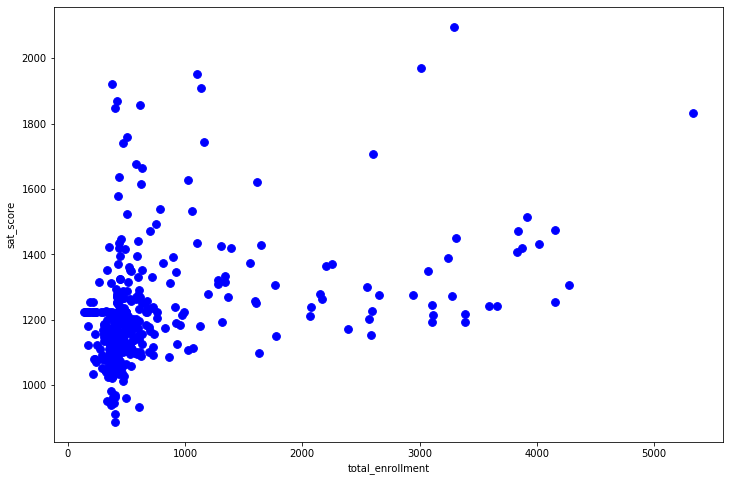

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='sat_score', figsize = (12, 8), s = 60, color ='blue')
plt.show()

### Exploring Schools With Low SAT Scores And Enrollment

From looking at the plot we just generated, it doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment. If there was a very strong correlation, we'd expect all the points to be arranged in a line. Instead, there's a large cluster of schools, then a few schools going off in 3 different directions.

However, there is an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what is causing our r-value to be so high. It's worth extracting the names of the schools in this cluster, so we can research them more.

In [26]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


### Plotting Language Learning Percentage

From our research in the last screen, we found that most of the high schools with low total enrollment and low SAT scores are actually schools with a high percentage of English language learners enrolled. This indicates that it's actually ell_percent that correlates strongly with sat_score instead of total_enrollment. To explore this relationship more, let's plot out ell_percent vs sat_score.

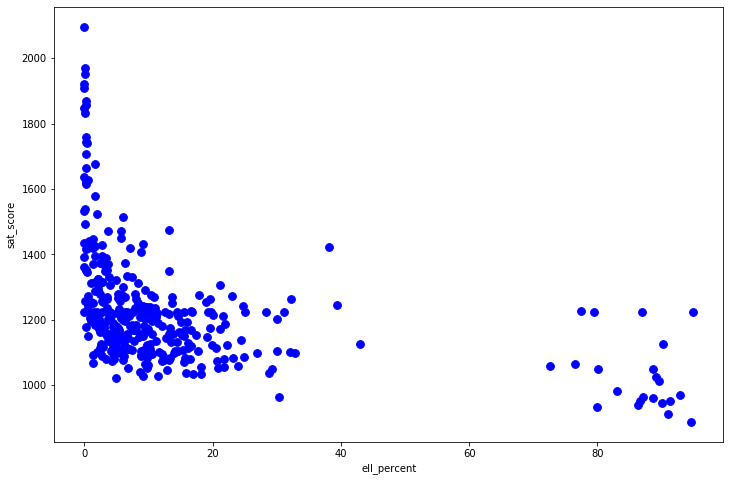

In [27]:
combined.plot.scatter(x='ell_percent', y='sat_score', figsize = (12,8), s=60, color = 'Blue')
plt.show()

### Mapping The Schools


It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster with very high ell_percent and low sat_score, which is the same group of international high schools that we investigated earlier.

In order to explore this relationship, we'll want to map out ell_percent by school district, so we can more easily see which parts of the city have a lot of English language learners.

In order to do this, we'll need to be able to create maps. We extracted the coordinates of all the schools earlier, and stored them in the lat and lon columns. This will enable us to plot all of the schools onto a map of the US, centered on New York City.

The code above will create a plot, centered on New York City (llcrnrlat, urcrnrlat, llcrnrlon, and urcrnrlon define the corners of the area that's shown), and will draw coastlines and rivers accordingly.

Now, all we need to do is convert our lat and lon coordinates into x and y coordinates so we can plot them on top of the map. This will show us where all the schools in our dataset are located.

In order to plot coordinates using basemap, we need to:

- Convert the Pandas Series containing the latitude and longitude to lists using the tolist method.
- Make a scatterplot using the longitudes and latitudes with the scatter method on the Basemap object.
- Show the plot using the show method.
Additionally, we need to make sure we pass a few keyword arguments to the scatter method:

- s -- this affects the size of the point that represents each school on the map.
- zorder -- this affects where the points that represent schools will be drawn in the z axis. If we set it to 2, the points will be drawn on top of the continents, which is where we want them.
- latlon -- this is a Boolean that specifies whether we're passing in latitude and longitude coordinates instead of x/y plot coordinates.

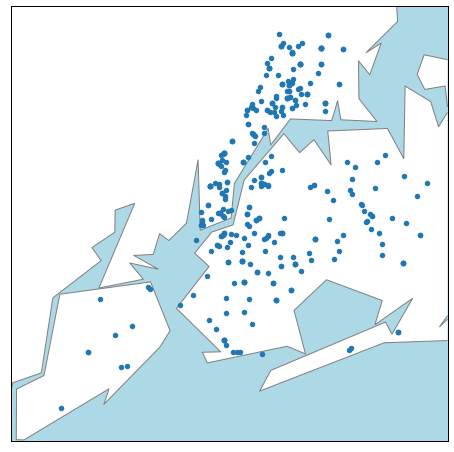

In [30]:
import os
os.environ["PROJ_LIB"] = "C:\\ProgramData\\Anaconda3\\Library\\share"; #fixr

from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(8,8))

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, marker = '.')

plt.show()

### Plotting Out Statistics
From the map above, we can see that schools are the most dense in Manhattan (the top of the map), and less dense in Brooklyn, The Bronx, Queens, and Staten Island.

Now that we can plot out the positions of the schools, we can start to display meaningful information on maps, such as the percentage of English language learners by area.

We can shade each point in the scatterplot by passing the keyword argument c into the scatter method. The c keyword argument will accept a sequence of numbers, and will shade points corresponding to lower numbers or higher numbers differently.

Whatever sequence of numbers we pass into the c keyword argument will be converted to a range from 0 to 1. These values will then be mapped onto a color map. Matplotlib has quite a few default colormaps. In our case, we'll use the summer colormap, which results in green points when the associated number is low, and yellow when it's high.

For example, let's say we plotted ell_percent by school. If we pass in the keyword argument c=combined["ell_percent"], then any school with a high ell_percent would be shaded yellow, and any school with a low ell_percent would be shaded green. We can specify a colormap by passing the cmap keyword argument to the scatter method.

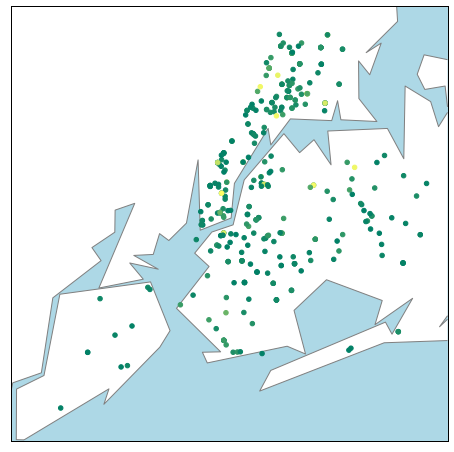

In [31]:

plt.figure(figsize=(8,8))

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, marker = '.', c=combined["ell_percent"], cmap="summer")
plt.show()

### Calculating District Level Statistics

Unfortunately, due to the number of schools, it's hard to interpret the map we made in the last screen. It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but we can't be sure. One way to make it easier to read very granular statistics is to aggregate them. In this case, we can aggregate based on district, which will enable us to plot ell_percent district by district instead of school by school.

In the last mission, we used the groupby and agg methods to find the mean class size for every unique DBN. The principle is the exact same, except here we'd find the mean of each column for every unique value in school_dist.

In [32]:
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251


### Plotting Ell_percent By District

Now that we've taken the mean of all the columns, we can plot out ell_percent by district. Not only did we find the mean of ell_percent, we also took the mean of the lon and lat columns, which will give us the coordinates for the center of each district.


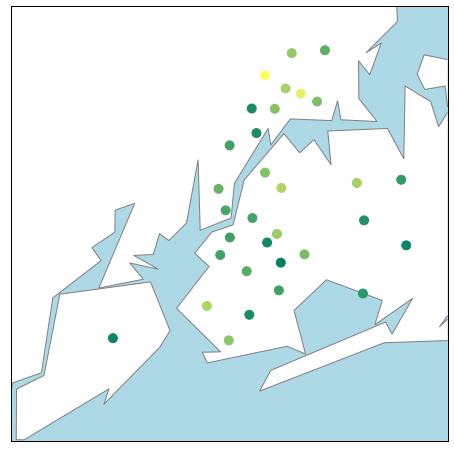

In [33]:
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')


longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

### Safety and SAT Scores
We'll investigate safety scores

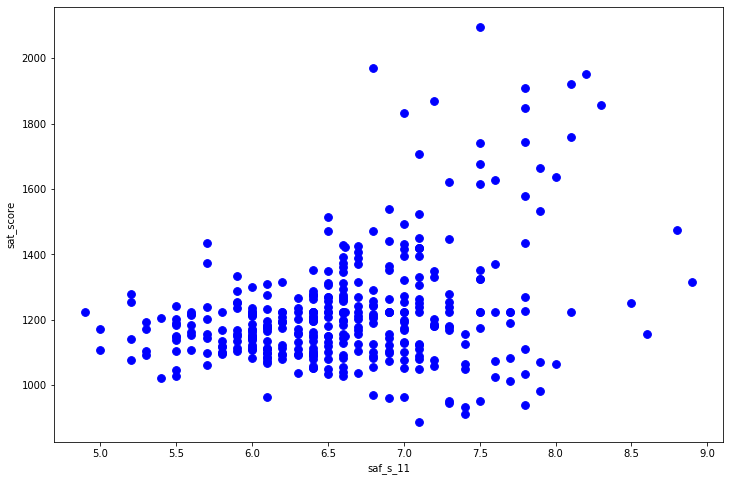

In [34]:
combined.plot.scatter("saf_s_11", "sat_score", figsize = (12,8), s =60, color = 'blue')

There appears to be a correlation between SAT scores and safety, although it isn't that strong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

### Plotting safety

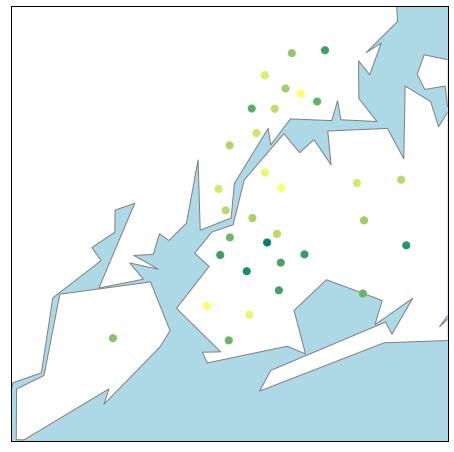

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)


plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

We mapped the average safety score ('saf_tot_11') by district. As we can see above, Manhattan, Queens and Lower Brooklyn show the high safety score value compared to other distirct.

### Racial Difference in SAT Scores

There are a few columns that indicate the percentage of each race at a given school:

- white_per
- asian_per
- black_per
- hispanic_per

By plotting out the correlations between these columns and sat_score, we can see if there are any racial differences in SAT performance.

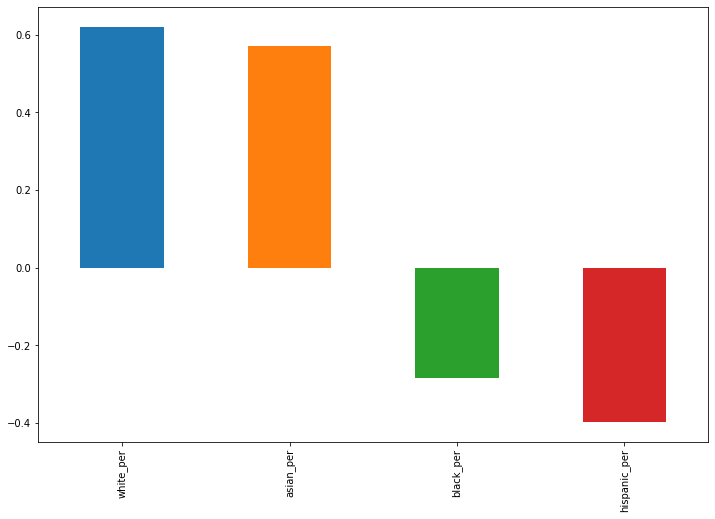

In [36]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar(figsize = (12,8))

We investigated how racial differences correlated with SAT score and it shows the fact that as there are more white or asian population, the SAT score is higher. In addition to that black and hispanic population ratio has negative correlation with SAT score.

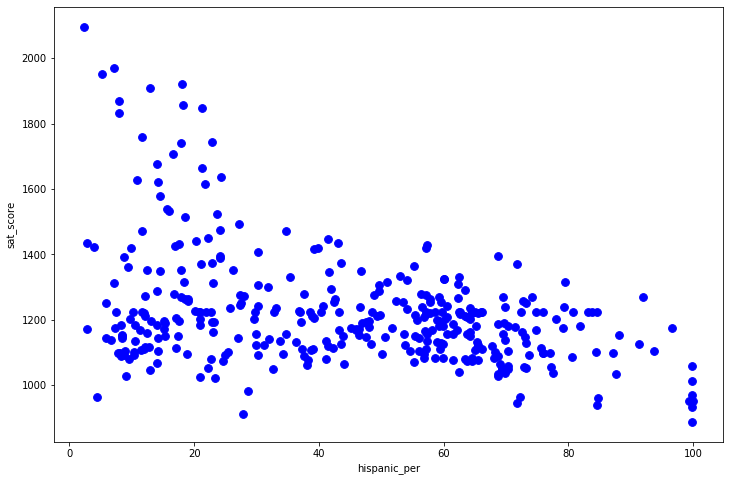

In [37]:
combined.plot.scatter(x='hispanic_per', y='sat_score', figsize=(12,8), s=60, color ='Blue')

Here is the scatter plot of 'hispanic_per' vs 'sat_score'. As you can see above, there is a tendency that he higher the hispanic population ratio is, the lower the SAT score is.

In [42]:
print(combined[combined['hispanic_per']>95]['SCHOOL NAME'])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

In [45]:
print(combined[(combined['hispanic_per']<10) & (combined['sat_score']>1800)]['SCHOOL NAME'])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools appears to be very selective liberal arts schools that have high academic standards.

### Gender differences in SAT score

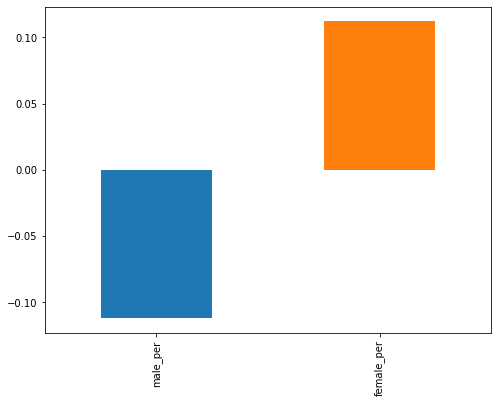

In [39]:
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar(figsize = (8, 6))

Female population ratio has a positive correlation with SAT score while male population ratio has negative one.

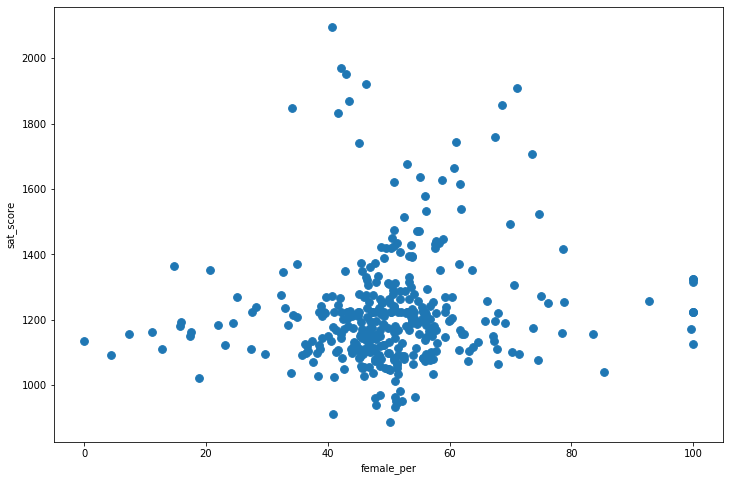

In [40]:
combined.plot.scatter(x='female_per', y='sat_score', figsize = (12, 8), s = 60)

The plot shows not much distinct pattern between female ratio and SAT score since most of the data clustered in 50% of female ratio.

In [50]:
print(combined[(combined['female_per']>60) & (combined['sat_score']>1700)]['SCHOOL NAME'])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools appears to be very selective liberal arts schools that have high academic standards.

### AP Exam Scores vs SAT Scores

In the US, the Advanced Placement, or AP, exams, are exams that high schoolers take in order to gain college credit. AP exams can be taken in many different subjects, and passing the AP exam means that colleges may grant you credits.

It makes sense that the number of students who took the AP exam in a school and SAT scores would be highly correlated, and let's dig into the relationship. Since total_enrollment is highly correlated with sat_score, we don't want to bias our results, so we'll instead look at the percentage of students in each school who took at least one AP exam.

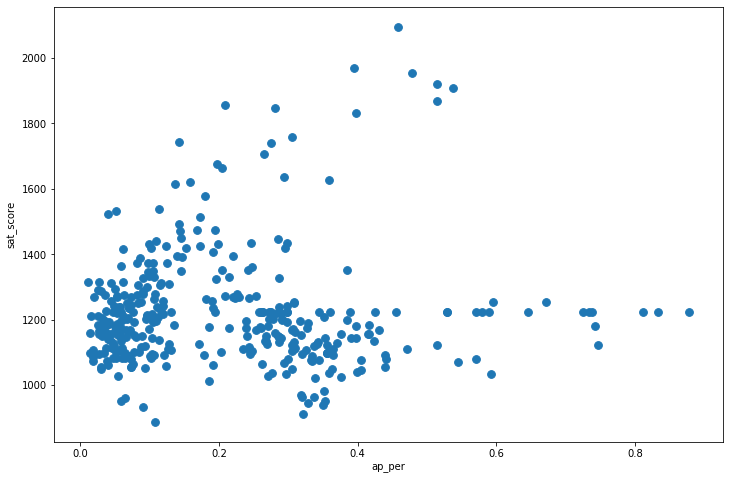

In [41]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score', figsize = (12, 8), s = 60)


It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.